# Reconstruct model of electron density in Tarumi et al

$n_{i+1}\approx\frac{\beta_i}{\alpha_i n_e}n_i$

If we can model this relation, we should be able to reconstruct the ion density fractions from their plots

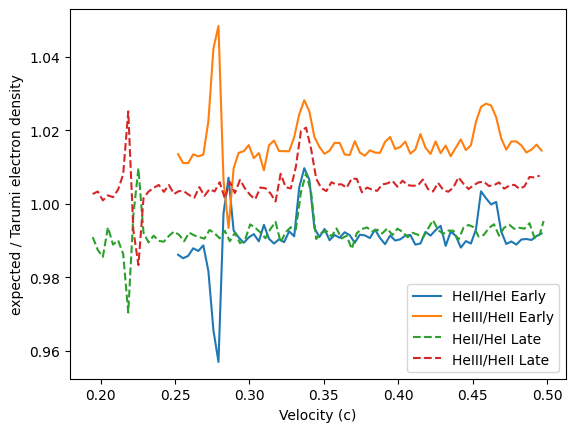

In [97]:
import astropy.units as u
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

T_list = [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]
alpha_HeIII = [9.73e-12, 8.42e-12, 7.28e-12, 6.28e-12, 5.42e-12, 4.67e-12, 4.02e-12, 3.46e-12, 2.96e-12, 2.55e-12, 2.18e-12]
alpha_HeII = [1.99e-12, 1.71e-12, 1.47e-12, 1.27e-12, 1.09e-12, 9.32e-13, 7.98e-13, 6.84e-13, 5.85e-13, 5.00e-13, 4.28e-13]

electron_model = lambda v, t_d: (1.5e8*t_d**-3) * (velocity_HeI/0.284)**-5# * (v-0.28)**-3

for epoch, T, t_d, v_phot, linestyle in zip(["Early", "Late"], [4400, 2750], [1.43, 3.41], [0.245, 0.19], ["-", "--"]):
    velocity_HeI, pops_HeI = np.loadtxt(f"Tarumi_densities/{epoch}11s.csv", unpack=True, delimiter=";")
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/{epoch}23S.csv", unpack=True, delimiter=";")
    velocity_HeII, pops_HeII = np.loadtxt(f"Tarumi_densities/{epoch}He+.csv", unpack=True, delimiter=";")
    velocity_HeIII, pops_HeIII = np.loadtxt(f"Tarumi_densities/{epoch}He2+.csv", unpack=True, delimiter=";")
    n_HeI = pops_HeI
    n_HeII = interp1d(velocity_HeII, pops_HeII, fill_value=np.nan, bounds_error=False)(velocity_HeI)
    #n_HeII += interp1d(velocity_23S, pops_23S, fill_value=np.nan, bounds_error=False)(velocity_HeI)
    n_HeIII = interp1d(velocity_HeIII, pops_HeIII, fill_value=np.nan, bounds_error=False)(velocity_HeI)

    q_dot = 1 * t_d**-1.3
    for i, (n_i, n_j, w_i, alphas, label) in enumerate(zip([n_HeI*1.2, n_HeII], [n_HeII, n_HeIII], [600, 3000], [alpha_HeII, alpha_HeIII], ["HeII/HeI", "HeIII/HeII"])):
        delta_v = velocity_HeI - v_phot
        T_v = T/(1/np.sqrt(1 - delta_v**2) * (1+delta_v))
        alpha = interp1d(T_list, alphas)( np.log10(T_v) )  
        beta = q_dot / w_i
        expected_ne = electron_model(velocity_HeI, t_d)
        actual_ne = beta/alpha * n_i / n_j
        plt.plot(velocity_HeI, actual_ne / expected_ne, label=label + " " + epoch, linestyle=linestyle)
        #plt.plot(velocity_HeI, (velocity_HeI/0.28)**-5)

#plt.yscale("log")
plt.xlabel("Velocity (c)")
plt.ylabel("expected / Tarumi electron density")
plt.legend()

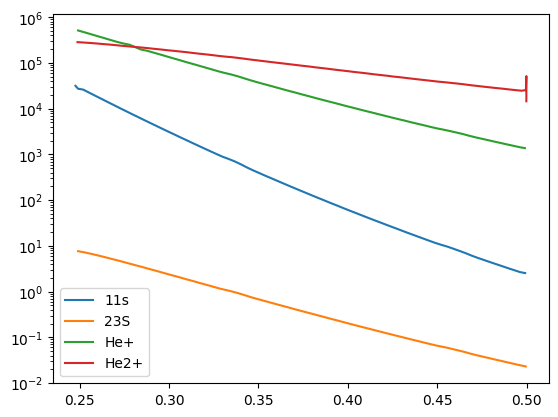

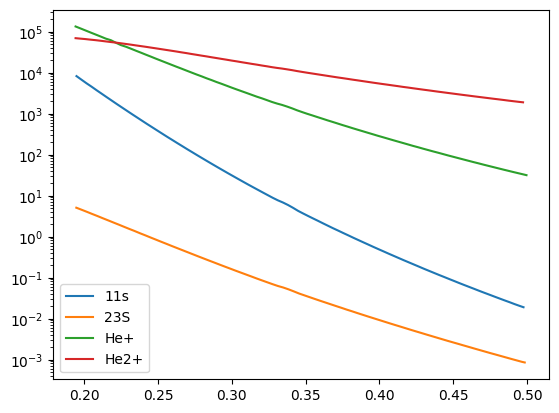

In [54]:
epochs = ["Early", "Late"]
files = ["11s", "23S", "He+", "He2+"]
for epoch in epochs:
    plt.figure()
    for file in files:
        velocity, pops = np.loadtxt(f"Tarumi_densities/{epoch}{file}.csv", unpack=True, delimiter=";")
        plt.semilogy(velocity, pops, label=file)
    plt.legend()